In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters  # 로이터 뉴스 데이터 로딩
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)


In [3]:
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')


46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사


In [4]:
y_train[0]

3

In [5]:
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = models.Sequential()
model.add(layers.Embedding(1000, 100))
model.add(layers.LSTM(100, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)


In [9]:
# 'x_train'과 'y_train'을 사용하여 모델 훈련
history = model.fit(x_train, y_train, batch_size=20, epochs=200,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

Epoch 1/200
450/450 [==============================] - 22s 45ms/step - loss: 2.2652 - accuracy: 0.4212 - val_loss: 1.9107 - val_accuracy: 0.5098
Epoch 2/200
450/450 [==============================] - 20s 44ms/step - loss: 1.7966 - accuracy: 0.5484 - val_loss: 1.9650 - val_accuracy: 0.5120
Epoch 3/200
450/450 [==============================] - 20s 44ms/step - loss: 1.7752 - accuracy: 0.5531 - val_loss: 2.0626 - val_accuracy: 0.5093
Epoch 4/200
450/450 [==============================] - 20s 44ms/step - loss: 1.6989 - accuracy: 0.5746 - val_loss: 1.6513 - val_accuracy: 0.5899
Epoch 5/200
450/450 [==============================] - 20s 44ms/step - loss: 1.5416 - accuracy: 0.6114 - val_loss: 1.5534 - val_accuracy: 0.6180
Epoch 6/200
450/450 [==============================] - 20s 44ms/step - loss: 1.4397 - accuracy: 0.6383 - val_loss: 1.4888 - val_accuracy: 0.6296
Epoch 7/200
450/450 [==============================] - 20s 44ms/step - loss: 1.3380 - accuracy: 0.6632 - val_loss: 1.3894 - val_ac

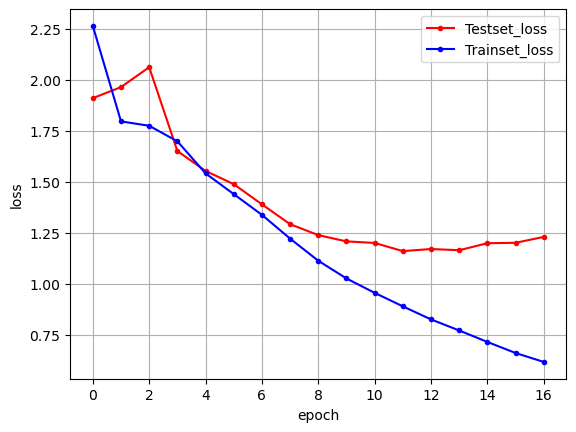

In [10]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()